In [ ]:
import random
import matplotlib.pyplot as plt

Geração: 0 | melhor dessa geração: 4 | melhor até agora: 4
Geração: 1 | melhor dessa geração: 3 | melhor até agora: 3
Geração: 2 | melhor dessa geração: 4 | melhor até agora: 3
Geração: 3 | melhor dessa geração: 3 | melhor até agora: 3
Geração: 4 | melhor dessa geração: 3 | melhor até agora: 3
Geração: 5 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 6 | melhor dessa geração: 3 | melhor até agora: 2
Geração: 7 | melhor dessa geração: 3 | melhor até agora: 2
Geração: 8 | melhor dessa geração: 3 | melhor até agora: 2
Geração: 9 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 10 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 11 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 12 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 13 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 14 | melhor dessa geração: 2 | melhor até agora: 2
Geração: 15 | melhor dessa geração: 1 | melhor até agora: 1
Geração: 16 | melhor dessa geração: 1 | melhor até

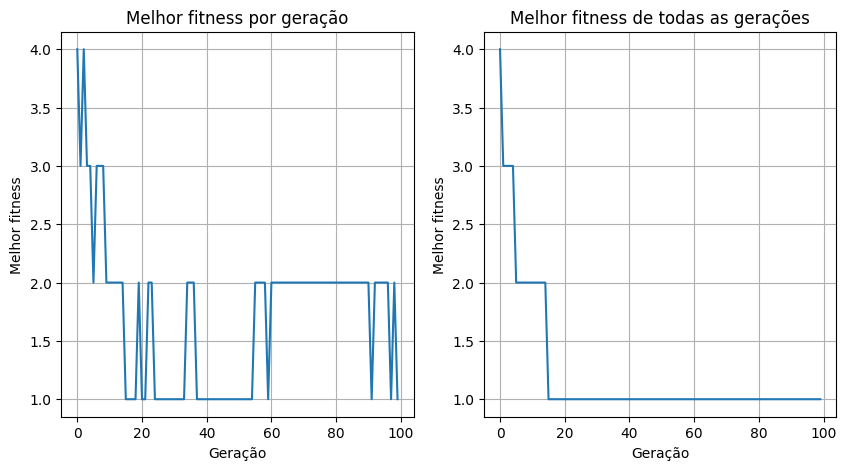

In [13]:
# desenha o tabuleiro com as rainhas posicionadas

def Print_result(chromosome: list):
    print("   ", end="")
    for i in range(len(chromosome)):
        print(" {}  ".format(i), end="")
    print("\n", end="")
    for i in range(len(chromosome)):
        print("   ", end="")
        for j in range(len(chromosome)):
            print("----", end="")
        print("\n", end="")
        print("{} |".format(i), end="")
        for j in range(len(chromosome)):
            if chromosome[i] == j:
                print(" R |", end="")
            else:
                print("   |", end="")
        print("\n", end="")
    print("   ", end="")
    for j in range(len(chromosome)):
        print("----", end="")
    print("\n", end="")

def plot_generations(results):

  geration = []
  bests_alltime = []
  bests_generation = []
  for result in results:
        geration.append(result[0])
        bests_alltime.append(result[2][1])
        bests_generation.append(result[1][1])



  # cria a figura com dois subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

  # plota o primeiro gráfico no primeiro subplot
  ax1.plot(geration, bests_generation)
  ax1.set_xlabel('Geração')
  ax1.set_ylabel('Melhor fitness')
  ax1.set_title('Melhor fitness por geração')
  ax1.grid(True)

  # plota o segundo gráfico no segundo subplot
  ax2.plot(geration, bests_alltime)
  ax2.set_xlabel('Geração')
  ax2.set_ylabel('Melhor fitness')
  ax2.set_title('Melhor fitness de todas as gerações')
  ax2.grid(True)

  # exibe a figura com os dois subplots
  plt.show()

def crossover(parent1: list, parent2: list, num_offspring: int = 1) -> list:

   offspring = []
   for i in range(num_offspring):
        crossover_point = random.randint(0, len(parent1) - 1)  # seleciona um ponto de crossover aleatoriamente
        child = parent1[:crossover_point] + parent2[crossover_point:]  # combina os genes dos pais
        offspring.append(child)

   return offspring
def mutation(chromosome: list, mutation_prob: float = 0.001):

  for i in range(len(chromosome)):
        if random.random() < mutation_prob:
            chromosome[i] = random.randint(0, len(chromosome) - 1)
  return chromosome

def fitness(chromosome: list):

  underscore = 0
  length = len(chromosome)
  for i in range(0, length - 1):
        for j in range(i + 1,
                       length):  # alterei o range para evitar contar a colisão de uma rainha com ela mesma e remover
            # duplicidades
            if chromosome[i] == chromosome[j]:
                underscore += 1

            # print(chromosome[i], chromosome[j], i, j)
            if abs(chromosome[i] - chromosome[j]) == abs(i - j):
                underscore += 1

  return underscore


def Generate_population(chromosome_size: int, population_size: int):

    population = []
    for _ in range(population_size):
        chromosome = []
        for _ in range(chromosome_size):
            chromosome.append(random.randint(0, chromosome_size - 1))
        population.append(chromosome)
    return population


def selection(population: list, best: float = 0.5) -> list:

    pop_sorted = sorted(population, key=lambda x: fitness(x))  # ordena a população pelo fitness
    selected = pop_sorted[:int(len(pop_sorted) * best)]  # seleciona os melhores indivíduos
    return selected


def Genetic_N_QUEENS(dimensions=8, population_size=10, generations=100, best=0.5, mutation_rate=0.001):

    population = Generate_population(dimensions, population_size)
    best_chromosome = population[0]
    num_offspring = int(
        population_size // (population_size * best))  # define o número de filhos que serão gerados por geração
    results = []

    for generation in range(generations):
        new_population = []

        # Seleção dos pais
        for parent1 in selection(population, best):
            parent2 = random.choice(population)

            # Reprodução
            offspring = crossover(parent1, parent2, num_offspring)

            # Mutação e adição dos filhos à nova população
            for child in offspring:
                mutated_child = mutation(child, mutation_rate)
                new_population.append(mutated_child)

        # Avaliação do melhor cromossomo da nova população
        current_best_chromosome = selection(new_population, 1)[0]

        # Atualização do melhor cromossomo encontrado
        if fitness(current_best_chromosome) < fitness(best_chromosome):
            best_chromosome = current_best_chromosome

        # Adição dos resultados da geração atual à lista de resultados
        results.append([generation,
                        [current_best_chromosome, fitness(current_best_chromosome)],
                        [best_chromosome, fitness(best_chromosome)]])

        # Atualização da população
        population = new_population

    return results


results = Genetic_N_QUEENS(dimensions=8, population_size=100, generations=100)

for result in results:
    print(f"Geração: {result[0]} | melhor dessa geração: {result[1][1]} | melhor até agora: {result[2][1]}")

print("Melhor resultado encontrado: ")
print(f"Geração: {results[-1][0]} | Genótipo: {results[-1][2][0]} | fitness: {results[-1][2][1]}")
Print_result(results[-1][2][0])  # mostra o melhor resultado encontrado

plot_generations(results)
